# singleton pattern

The new method is a static method that belongs to the class itself. It’s responsible for creating and returning a new instance of the class. The method takes the class as its first argument, followed by any additional arguments that need to be passed to it.

The __new__ method is called before the __init__ method and is often used when you need to control the object creation process

The __init__ method, is an instance method that is responsible for initializing the newly created object. 



In [18]:
class MyClass:
    def __new__(cls, *args, **kwargs):
        instance = super().__new__(cls)
        return instance
    

In [32]:
class Singleton:
    def __new__(cls):
        if not hasattr(cls, "_instance"):
            cls._instance = super().__new__(cls)
        return cls._instance
    
singleton1 = Singleton()
singleton2 = Singleton()
print(singleton1 == singleton2)

True


In [41]:
class Singleton:
    def __new__(cls,*args, **kwargs):
        if not hasattr(cls, "_instance"):
            cls._instance = super().__new__(cls)
        return cls._instance
    
    def __init__(self, age):
        if not hasattr(self, 'initialized'):  # Check if already initialized
            self.age = age
            self.initialized = True

   
    
singleton1 = Singleton(age=22)
print(singleton1.age)
singleton2 = Singleton(age=44)
print(singleton2.age)
print(singleton1 == singleton2)

22
22
True


# Factory pattern

difference between staticmethod and classmethod in python

static method is your plain function with self and cls.
class method you need to add cls as first argument.

if you don't type @staticmethod on top, you can't use that function with Class.method() or using object also Class().method()

In [63]:
class A:
    def foo(self, x):
        print(f"executing foo({self}, {x})")

    @classmethod
    def class_foo(cls, x):
        print(f"executing class_foo({cls}, {x})")

    @staticmethod
    def static_foo(x):
        print(f"executing static_foo({x})")

a = A()
a.foo(1)
a.class_foo(1)
A.class_foo(1)

a.static_foo(1)
# executing static_foo(1)

A.static_foo('hi')
# executing static_foo(hi)



executing foo(<__main__.A object at 0x0000019276E400B0>, 1)
executing class_foo(<class '__main__.A'>, 1)
executing class_foo(<class '__main__.A'>, 1)
executing static_foo(1)
executing static_foo(hi)


In [64]:
class Dog:
    def speak(self):
        return "Woof!"

class Cat:
    def speak(self):
        return "Meow!"

class AnimalFactory:
    @staticmethod
    def create_animal(animal_type):
        if animal_type == 'dog':
            return Dog()
        elif animal_type == 'cat':
            return Cat()
        else:
            raise ValueError("Unknown animal type")
        

    # @staticmethod
    # def create_animal(animal_type):
    #     if animal_type == 'dog':
    #         return Dog()
    #     elif animal_type == 'cat':
    #         return Cat()
    #     else:
    #         raise ValueError("Unknown animal type")

# Usage
animal = AnimalFactory.create_animal('dog')
print(animal.speak())  # Output: Woof!

# animal = AnimalFactory().create_animal2('dog')
# print(animal.speak())  # Output: Woof!


Woof!


In [86]:
#abstract factory
from abc import ABC, abstractmethod
from typing import Union
class Animal(ABC):
    @abstractmethod
    def legs(self):
        pass
class Dog(Animal):
    def legs(self):
        return "I run on 4 legs"
class Bear(Animal):
    def legs(self):
        return "I run on 2 legs"

class Fish(ABC):
    @abstractmethod
    def swim(self):
        pass

class Dolphin(Fish):
    def swim(self):
        return "I swim fast"

class Whale(Fish):
    def swim(self):
        return "I swim very slow"


class FishFactory:
    @staticmethod
    def create_fish(fish_type:str):
        if fish_type.lower()=="whale":
            return Whale()
        elif fish_type.lower()=="dolphin":
            return Dolphin()
        else:
            return ValueError("unknown fish type")
class AnimalFactory:
    @staticmethod
    def create_animal(animal_type:str):
        if animal_type.lower()=="dog":
            return Dog()
        elif animal_type.lower()=="bear":
            return Bear()
        else:
            return ValueError("unknown animal type")
        
class Factory:
    @staticmethod
    def get_factory(factory_type:str):
        if factory_type.lower()=="fish":
            return FishFactory()
        elif factory_type.lower()=="animal":
            return AnimalFactory()
        return ValueError("This factory don't exist at the moment")

if __name__=="__main__":
    factory = Factory().get_factory("fish")
    whale = factory.create_fish("whale")
    print(whale.swim())

    factory = Factory().get_factory("animal")
    bear = factory.create_animal("bear")
    print(bear.legs())


I swim very slow
I run on 2 legs


# Strategy pattern

In [71]:
class Operation:
    def do_operation(self, a, b):
        pass

class AddOperation(Operation):
    def do_operation(self, a, b):
        return a + b

class SubtractOperation(Operation):
    def do_operation(self, a, b):
        return a - b

class Context:
    def __init__(self, operation):
        self.operation = operation

    def execute(self, a, b):
        return self.operation.do_operation(a, b)

# Usage
context = Context(AddOperation())
print(context.execute(5, 3))  # Output: 8

context = Context(SubtractOperation())
print(context.execute(5, 3))  # Output: 2


8
2


factory and strategy are kinda similar my take on this is

let say i go to factory and just tell i want this product i don't need to know what are the classes for it. I can get product based on my requirement.

for strategy, we can create a class called opeartions and implement all strategies, in above scenario like +, -, /, etc.
but if we have 100s of strategy adding it in one file is not so good. so we'll go with passing the object of strategy

if one or more siblings extended from parent have over ridden code and has same code then it makes sense to take this code
outside to prevent code duplicacy.
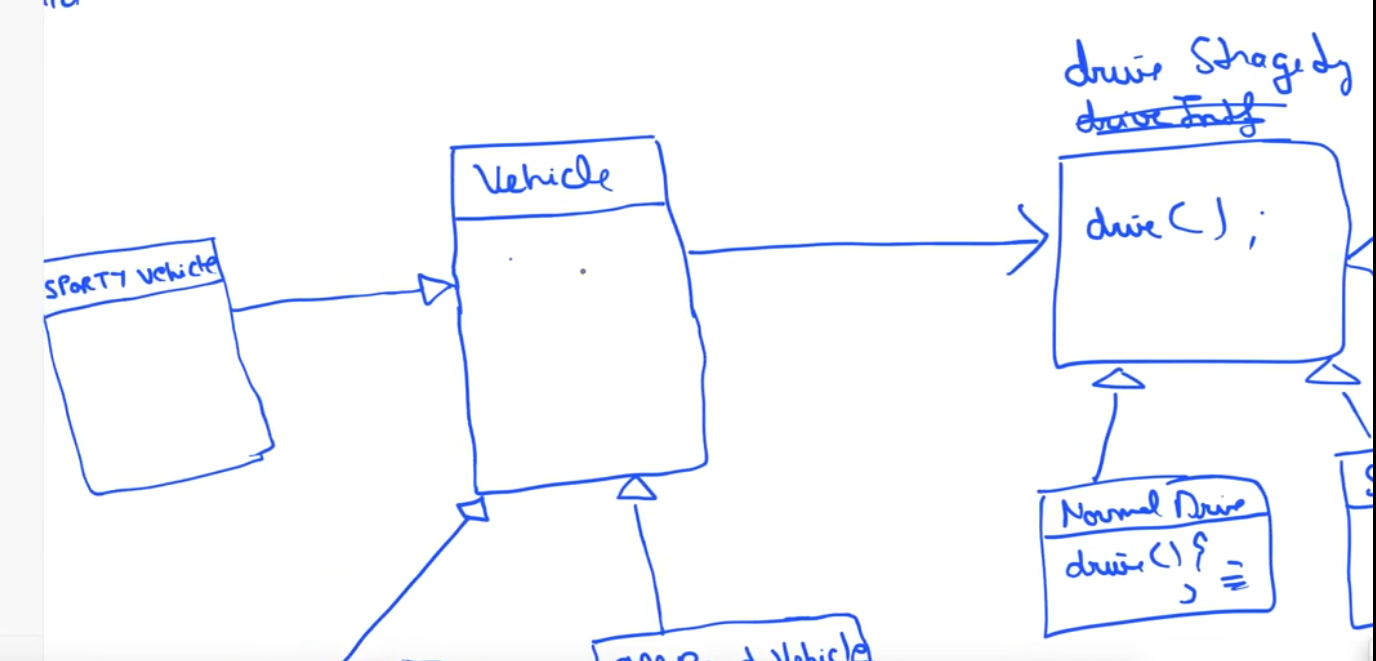

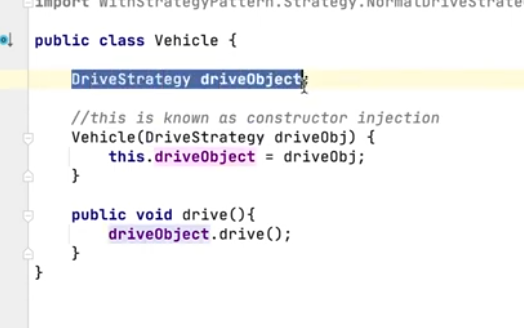

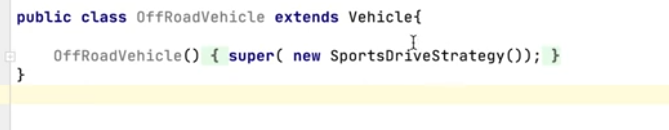

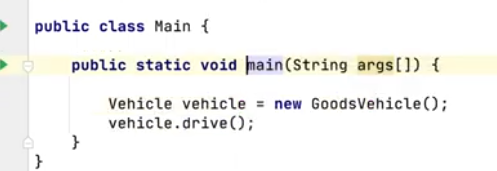

In [75]:
from abc import ABC, abstractmethod
class Strategy(ABC):
    @abstractmethod
    def operate(self, a,b):
        pass

class Multiply(Strategy):
    def operate(self, a, b):
        return a*b
    
class Divide(Strategy):
    def operate(self, a, b):
        return a/b
    

class Context:
    def __init__(self,strategy:Strategy) -> None:
        self.strategy = strategy
    
    def execute(self, a, b):
        return self.strategy.operate(a,b)

    
obj = Context(Multiply())
print(obj.execute(5,9))

45


# Observer pattern

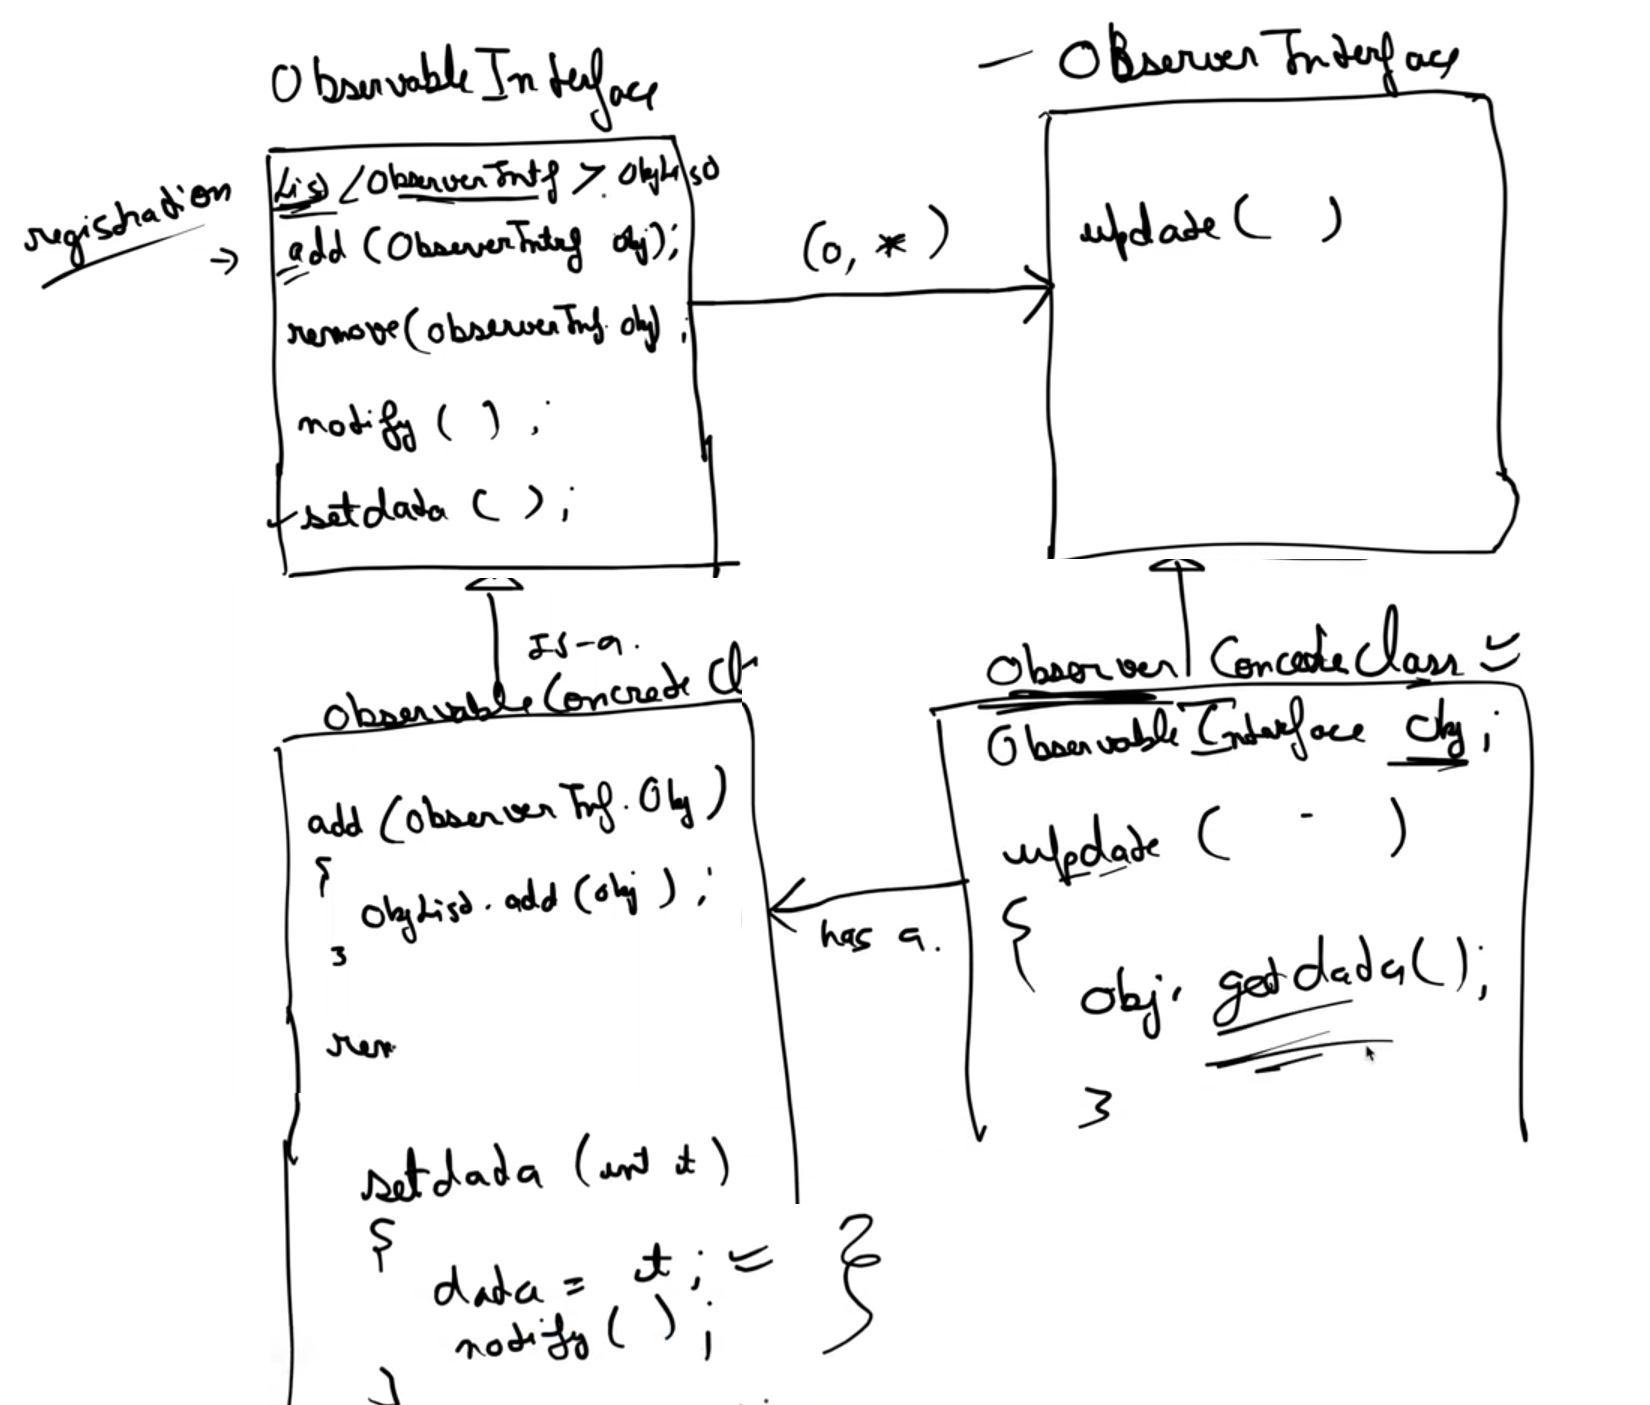

In [78]:
from abc import ABC, abstractmethod

class SubjectInterface(ABC):
    @abstractmethod
    def add(self, observer):
        pass

    @abstractmethod
    def remove(self, observer):
        pass

    @abstractmethod
    def notify_subscribers(self):
        pass

    @abstractmethod
    def set_stock_count(self, new_added_stock):
        pass

    @abstractmethod
    def get_stock_count(self):
        pass


class Subject(SubjectInterface):
    def __init__(self):
        self.observer_list = []
        self.stock_count = 0

    def add(self, observer):
        self.observer_list.append(observer)

    def remove(self, observer):
        self.observer_list.remove(observer)

    def notify_subscribers(self):
        for observer in self.observer_list:
            observer.update()

    def set_stock_count(self, new_added_stock):
        if self.stock_count == 0:
            self.notify_subscribers()
        self.stock_count += new_added_stock

    def get_stock_count(self):
        return self.stock_count


class ObserverInterface(ABC):
    @abstractmethod
    def update(self):
        pass


class EmailObserver(ObserverInterface):
    def __init__(self, email, observable):
        self.email = email
        self.observable = observable

    def update(self):
        self.send_mail(self.email, "New stock has arrived")

    def send_mail(self, email, message):
        print(f"Email sent to {email} with message: {message}")


class MobileObserver(ObserverInterface):
    def __init__(self, mobile_no, observable):
        self.mobile_no = mobile_no
        self.observable = observable

    def update(self):
        self.send_message(self.mobile_no, "New stock has arrived")

    def send_message(self, mobile_no, message):
        print(f"SMS sent to {mobile_no} with message: {message}")


if __name__ == "__main__":
    iphone_observable = Subject()
    
    observer1 = EmailObserver("example1@example.com", iphone_observable)
    observer2 = EmailObserver("example2@example.com", iphone_observable)
    observer3 = MobileObserver(1234567890, iphone_observable)
    
    iphone_observable.add(observer1)
    iphone_observable.add(observer2)
    iphone_observable.add(observer3)
    
    iphone_observable.set_stock_count(10)  # this will notify 
    iphone_observable.set_stock_count(10)  # this won't notify bcz stock is not zero


Email sent to example1@example.com with message: New stock has arrived
Email sent to example2@example.com with message: New stock has arrived
SMS sent to 1234567890 with message: New stock has arrived


# Decorator Pattern

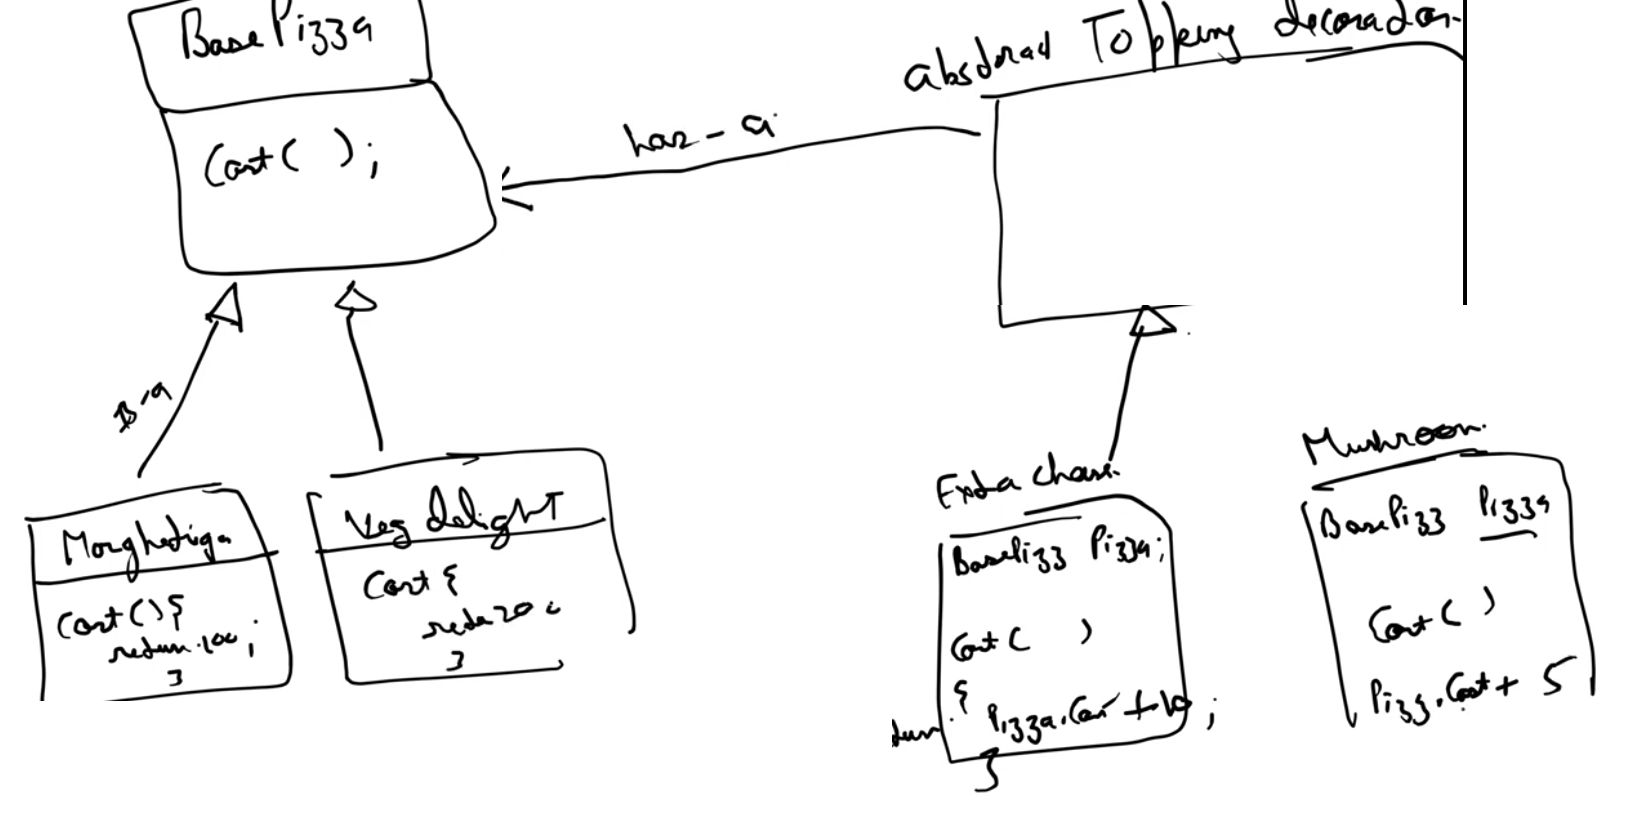

In [79]:
from abc import ABC, abstractmethod

class BasePizza(ABC):
    @abstractmethod
    def cost(self):
        pass

class FarmHouse(BasePizza):
    def cost(self):
        return 200

class VegDelight(BasePizza):
    def cost(self):
        return 120

class ToppingDecorator(BasePizza):
    def __init__(self, base_pizza: BasePizza):
        self.base_pizza = base_pizza

class ExtraCheese(ToppingDecorator):
    def cost(self):
        return self.base_pizza.cost() + 10

class Mushroom(ToppingDecorator):
    def cost(self):
        return self.base_pizza.cost() + 15
        

if __name__ == "__main__":
    farm_house_pizza = FarmHouse()
    veg_delight_pizza = VegDelight()

    cheese_farm_house = ExtraCheese(farm_house_pizza)
    cheese_mushroom_farm_house = Mushroom(cheese_farm_house)

    cheese_veg_delight = ExtraCheese(veg_delight_pizza)
    mushroom_veg_delight = Mushroom(veg_delight_pizza)

    print(f"FarmHouse Pizza Cost: {farm_house_pizza.cost()}")
    print(f"VegDelight Pizza Cost: {veg_delight_pizza.cost()}")

    print(f"Cheese FarmHouse Pizza Cost: {cheese_farm_house.cost()}")
    print(f"Cheese Mushroom FarmHouse Pizza Cost: {cheese_mushroom_farm_house.cost()}")

    print(f"Cheese VegDelight Pizza Cost: {cheese_veg_delight.cost()}")
    print(f"Mushroom VegDelight Pizza Cost: {mushroom_veg_delight.cost()}")


FarmHouse Pizza Cost: 200
VegDelight Pizza Cost: 120
Cheese FarmHouse Pizza Cost: 210
Cheese Mushroom FarmHouse Pizza Cost: 225
Cheese VegDelight Pizza Cost: 130
Mushroom VegDelight Pizza Cost: 135


In [87]:
5*1024/60

85.33333333333333

# Adapter

make two incompatible interfaces work with each other

example power socket

json to xml

when return type is different that what you wanted

In [10]:
from abc import ABC, abstractmethod

class Compatilble:
    def get(self):
        return "Something in english"

class InCompatible:
    def get(self):
        return "Something in french"
    
class Client:
    def __init__(self, compatible : Compatilble) -> None:
        self.compatible = compatible
    
    def get_text(self):
        return self.compatible.get()
    
class Adapter(Compatilble):
    def __init__(self, incompatible : InCompatible) -> None:
        self.incompatible = incompatible
    
    def get(self):
        return self.incompatible.get() + " translated in english"

print(Client(Compatilble()).get_text())
adap = Adapter(InCompatible())
print(Client(adap).get_text())


Something in english
Something in french translated in english


// Compatible Interface
interface Compatible {
    String get();
}

// Incompatible Class
class Incompatible {
    public String get() {
        return "Quelque chose en français";
    }
}

// Client Class
class Client {
    private Compatible compatible;

    public Client(Compatible compatible) {
        this.compatible = compatible;
    }

    public String getText() {
        return this.compatible.get();
    }
}

// Adapter Class
class Adapter implements Compatible {
    private Incompatible incompatible;

    public Adapter(Incompatible incompatible) {
        this.incompatible = incompatible;
    }

    @Override
    public String get() {
        return this.incompatible.get() + " translated in English";
    }
}

// Main Class to demonstrate the Adapter Pattern
public class Main {
    public static void main(String[] args) {
        Compatible compatible = new Compatible() {
            @Override
            public String get() {
                return "Something in English";
            }
        };

        Client client = new Client(compatible);
        System.out.println(client.getText());

        Adapter adapter = new Adapter(new Incompatible());
        Client adaptedClient = new Client(adapter);
        System.out.println(adaptedClient.getText());
    }
}


# Chain of Responsibility

In [1]:
from enum import Enum
from abc import ABC, abstractmethod

class LogLevel(Enum):
    ERROR = 1
    INFO = 2
    DEBUG = 3

class LogProcessor(ABC):
    def __init__(self, next_processor=None) -> None:
        self.next_processor = next_processor

    def log(self,log_level:LogLevel, mssge:str):
        if self.next_processor:
            self.next_processor.log(log_level, mssge)
        else:
            raise Exception("can't fulfill this request")
    
class InfoLogProcessor(LogProcessor):
    def __init__(self, next_processor=None) -> None:  # in python you don't need this
        super().__init__(next_processor)                # in python you don't need this
    def log(self, log_level: LogLevel, mssge: str):
        if log_level.name=="INFO":
            print(mssge)
        else:
            super().log(log_level, mssge)

class DebugLogProcessor(LogProcessor):
    def __init__(self, next_processor=None) -> None:   # in python you don't need this
        super().__init__(next_processor)                # in python you don't need this
    def log(self, log_level: LogLevel, mssge: str):
        if log_level.name=="DEBUG":
            print(mssge)
        else:
            super().log(log_level, mssge)

class ErrorLogProcessor(LogProcessor):
    def __init__(self, next_processor=None) -> None:   # in python you don't need this
        super().__init__(next_processor)                # in python you don't need this
    def log(self, log_level: LogLevel, mssge: str):
        if log_level.name=="ERROR":
            print(mssge)
        else:
            super().log(log_level, mssge)

if __name__=="__main__":
    log_obj = InfoLogProcessor(DebugLogProcessor(ErrorLogProcessor()))
    log_obj.log(LogLevel.ERROR, "exception happened")
    log_obj.log(LogLevel.DEBUG, "need to debug this")
    log_obj.log(LogLevel.INFO, "just for info")

exception happened
need to debug this
just for info
